In [551]:
import pandas as pd

df = pd.read_csv('resources/train.csv')

# Exploratory Data Analysis

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 81 columns in the dataset and the dataset contains 1460 rows. The label is SalePrice

There's no doublon in the dataset but a lot of NA values.

The columns with many missing values are: PoolQC(NA => No Pool), Fence(NA => No Fence), MiscFeature, MasVnrType, Alley (around 50% of missing values)

The columns that seems to be useless are: Id, YrSold, PoolArea, Utilities, LandContour, Street, LandSlope, LotConfig(pas sûr)

# Data Preprocessing and encoding

In [553]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso


df = df[['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'GarageArea', 'LotArea', 'OverallCond','OverallQual', 'Neighborhood', 'KitchenQual', 'ExterQual', 'SalePrice', 'GarageCars', 'Foundation', 'BsmtQual', 'RoofStyle', 'BsmtExposure']]

# Initialize the encoders
one_hot_encoder = OneHotEncoder()

# Set X and y
X = df.drop(columns='SalePrice')
y = df['SalePrice']

# One hot encoding
X = one_hot_encoder.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model

In [554]:
# Initialize the model
model = Lasso(max_iter=10000)

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [555]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / y_test.mean()) * 100

r2 = r2_score(y_test, y_pred)

print("Erreur absolue moyenne (MAE):", mae)
print("Erreur absolue moyenne en pourcentage (MAPE):", mape)
print("Erreur quadratique moyenne (RMSE):", rmse)
print("RMSE en pourcentage:", rmse_percentage)
print("Coefficient de détermination (R2):", r2)

Erreur absolue moyenne (MAE): 24418.881531802486
Erreur absolue moyenne en pourcentage (MAPE): 0.15165594867227875
Erreur quadratique moyenne (RMSE): 36638.19894803175
RMSE en pourcentage: 20.486601171889916
Coefficient de détermination (R2): 0.8249934115060503


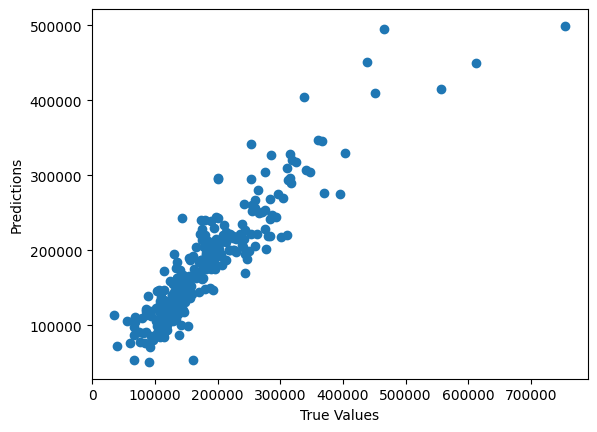

In [556]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

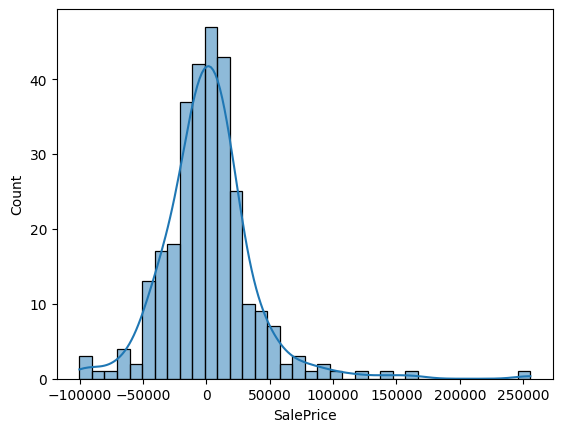

In [557]:
import seaborn as sns

sns.histplot(y_test - y_pred, kde=True)